In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Avenir'


In [3]:
bike_df = pd.read_csv('~/aiffel/data/bike_train.csv')

In [4]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

In [8]:
pd.to_datetime(bike_df['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['weekday'] = bike_df['datetime'].dt.weekday

In [11]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  weekday     10886 non-

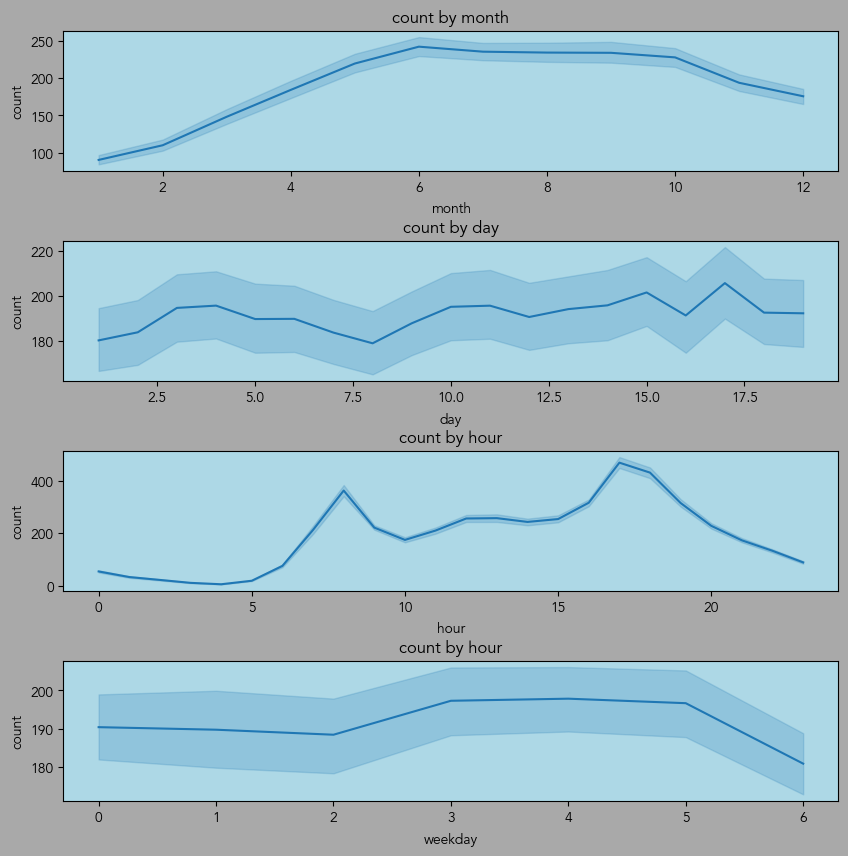

In [13]:
f, ax = plt.subplots(4, 1, figsize=(10, 10), facecolor = 'darkgray')

sns.lineplot(data=bike_df, x='month', y='count', ax=ax[0])
ax[0].set_title('count by month')
ax[0].set_facecolor('lightblue')

sns.lineplot(data=bike_df, x='day', y='count', ax=ax[1])
ax[1].set_title('count by day')
ax[1].set_facecolor('lightblue')

sns.lineplot(data=bike_df, x='hour', y='count', ax=ax[2])
ax[2].set_title('count by hour')
ax[2].set_facecolor('lightblue')

sns.lineplot(data=bike_df, x='weekday', y='count', ax=ax[3])
ax[3].set_title('count by hour')
ax[3].set_facecolor('lightblue')


plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [14]:
bike_df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_3054/4176763655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_df['temp'], ax = ax[0])
/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_3054/4176763655.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_df['atem

Text(0.5, 1.0, 'Atemp distribution plot')

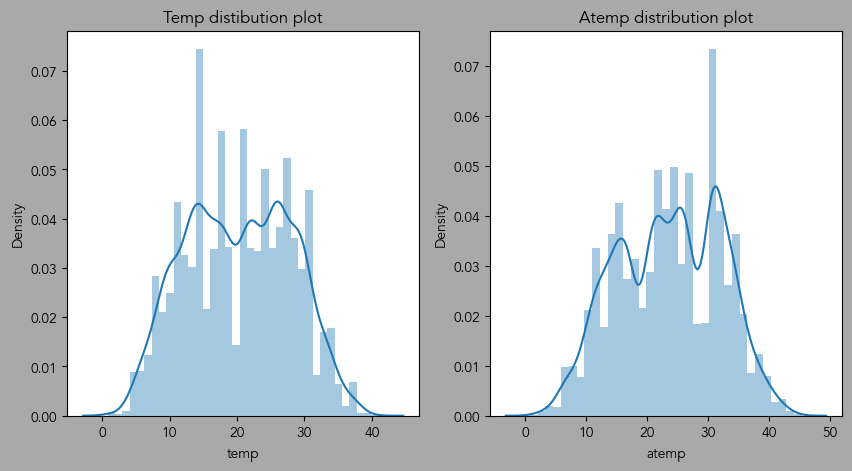

In [20]:
f, ax = plt.subplots(1, 2, figsize = ( 10, 5), facecolor = 'darkgray')

sns.distplot(bike_df['temp'], ax = ax[0])
ax[0].set_title('Temp distibution plot')

sns.distplot(bike_df['atemp'], ax = ax[1])
ax[1].set_title('Atemp distribution plot')

Text(0.5, 1.0, 'Atemp distribution plot')

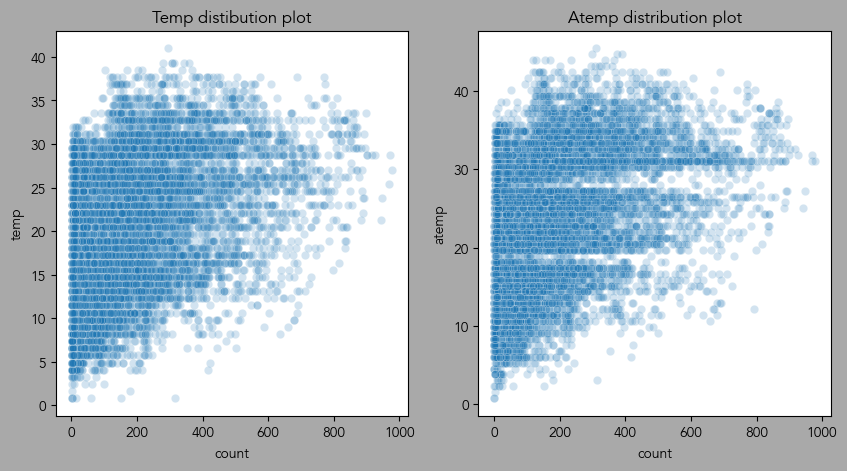

In [23]:
f, ax = plt.subplots(1, 2, figsize = ( 10, 5), facecolor = 'darkgray')

sns.scatterplot(data = bike_df, x = 'count', y = 'temp', ax = ax[0], alpha = 0.2)
ax[0].set_title('Temp distibution plot')

sns.scatterplot(data = bike_df, x = 'count', y = 'atemp', ax = ax[1], alpha = 0.2)
ax[1].set_title('Atemp distribution plot')

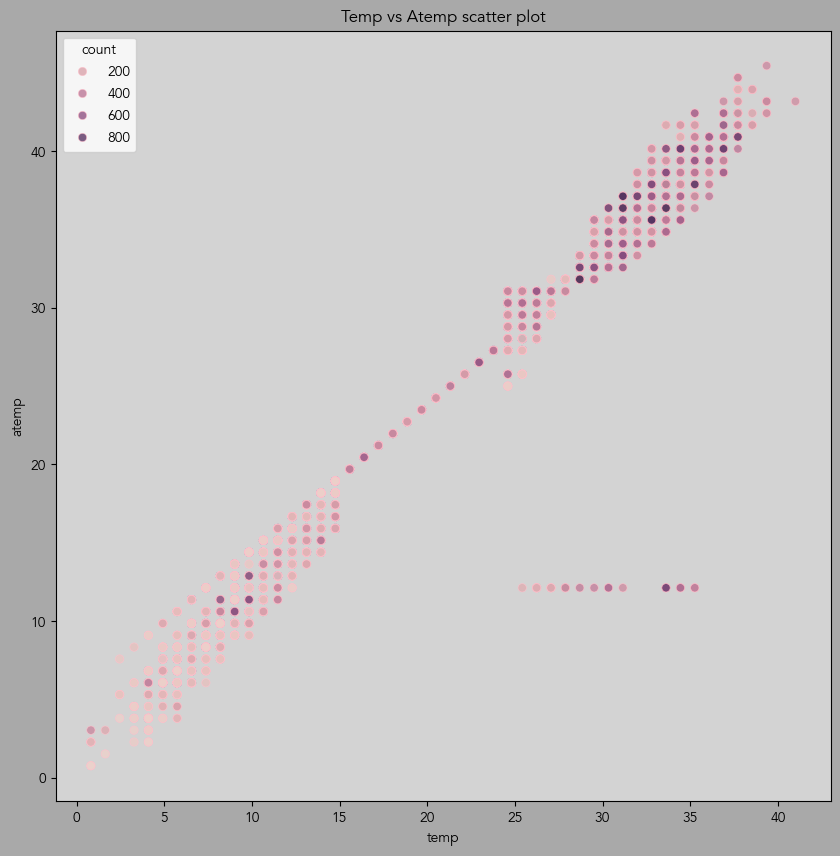

In [33]:
f, ax = plt.subplots(1, 1, figsize = (10, 10,), facecolor = 'darkgray')
sns.scatterplot(data = bike_df, x = 'temp', y = 'atemp', ax = ax, alpha = 0.8, hue = 'count', edgecolor = 'pink')
ax.set_title('Temp vs Atemp scatter plot')
ax.set_facecolor('lightgray')

<Axes: xlabel='datetime', ylabel='count'>

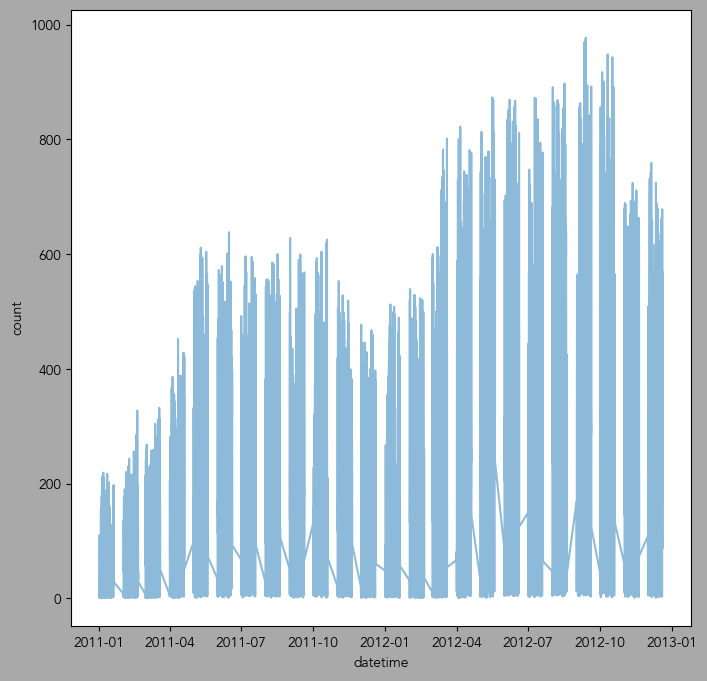

In [42]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), facecolor = 'darkgray')
sns.lineplot(data = bike_df, x = 'datetime', y = 'count', ax = ax, alpha = 0.5)

<Axes: xlabel='temp', ylabel='count'>

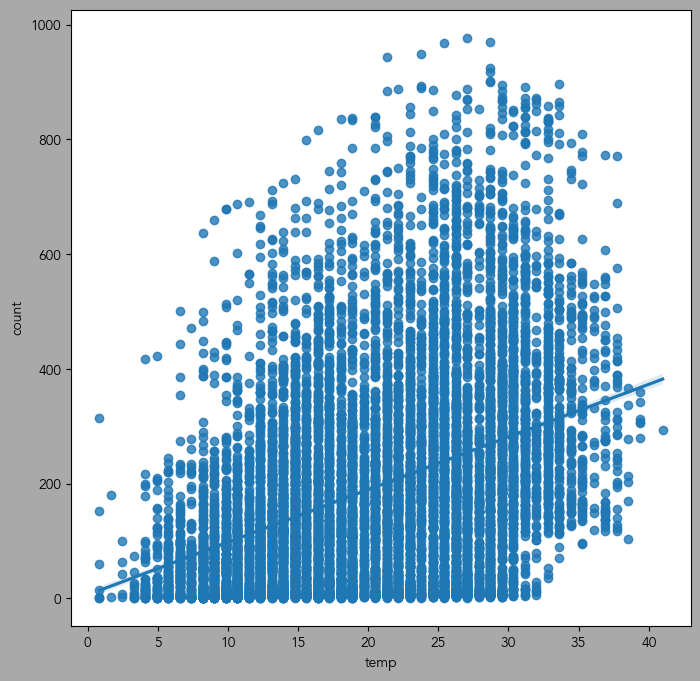

In [47]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), facecolor = 'darkgray')
sns.regplot(data = bike_df, x = 'temp', y = 'count', ax = ax)

<Axes: xlabel='weather', ylabel='count'>

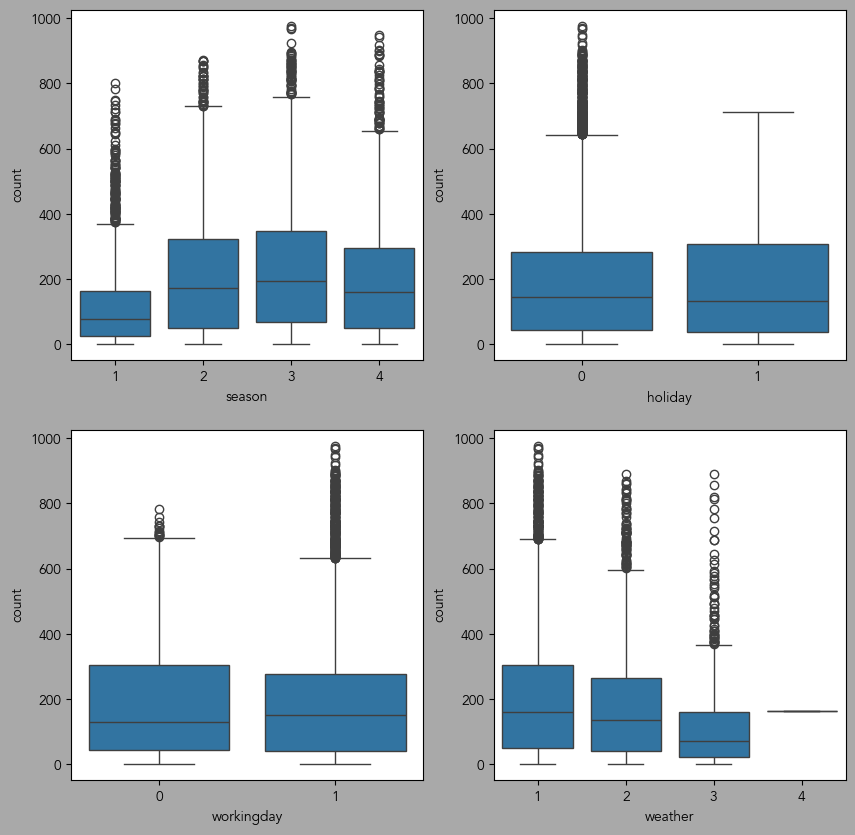

In [58]:
f, ax = plt.subplots(2, 2, figsize = (10, 10), facecolor = 'darkgray')

sns.boxplot(data = bike_df, x = 'season', y = 'count', ax = ax[0][0])
sns.boxplot(data = bike_df, x = 'holiday', y = 'count', ax = ax[0][1])
sns.boxplot(data = bike_df, x = 'workingday', y = 'count', ax = ax[1][0])
sns.boxplot(data = bike_df, x = 'weather', y = 'count', ax = ax[1][1])


<Axes: xlabel='windspeed', ylabel='count'>

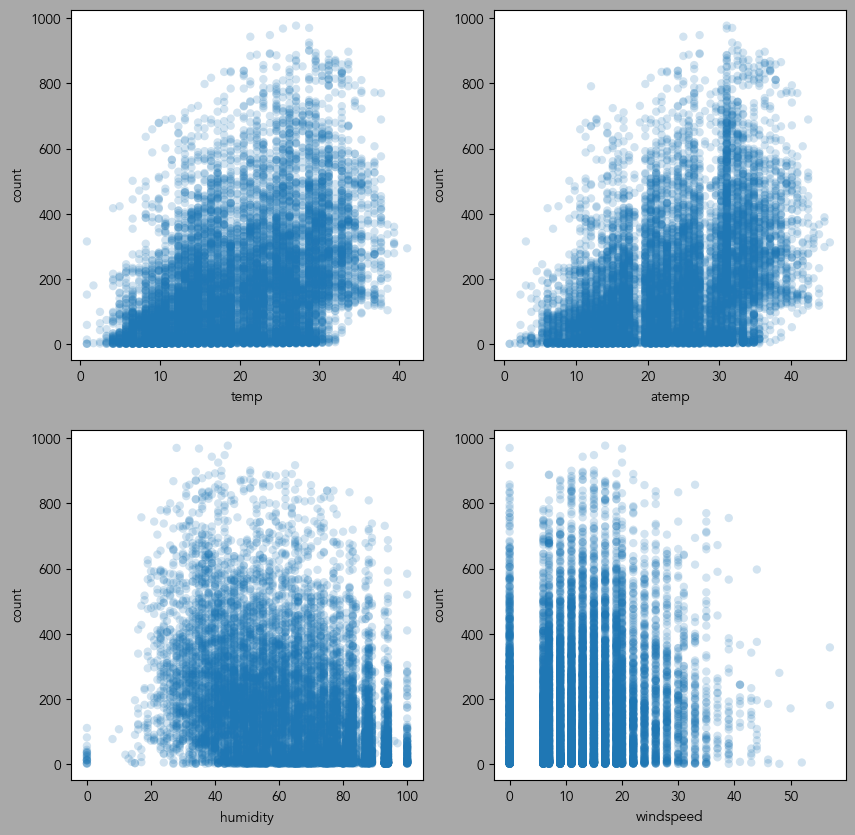

In [64]:
f, ax = plt.subplots(2, 2, figsize = (10, 10), facecolor = 'darkgray')

sns.scatterplot(data = bike_df, x = 'temp', y = 'count', ax = ax[0][0], alpha = 0.2, edgecolor = 'none')
sns.scatterplot(data = bike_df, x = 'atemp', y = 'count', ax = ax[0][1], alpha = 0.2, edgecolor = 'none')
sns.scatterplot(data = bike_df, x = 'humidity', y = 'count', ax = ax[1][0], alpha = 0.2, edgecolor = 'none')
sns.scatterplot(data = bike_df, x = 'windspeed', y = 'count', ax = ax[1][1], alpha = 0.2, edgecolor = 'none')

<Axes: xlabel='windspeed', ylabel='count'>

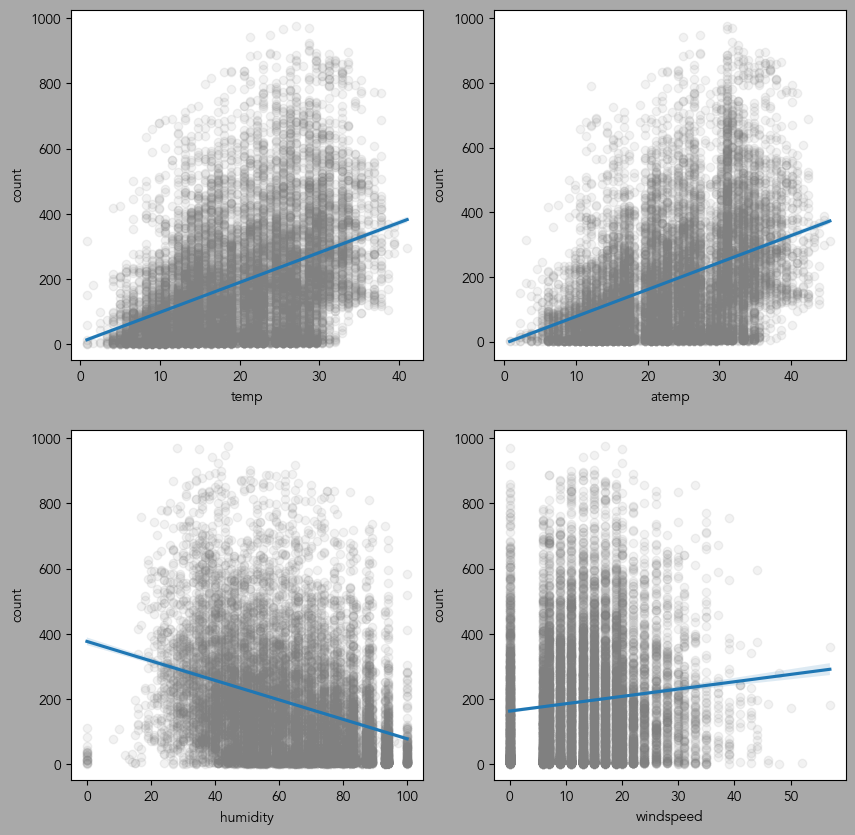

In [71]:
f, ax = plt.subplots(2, 2, figsize = (10, 10), facecolor = 'darkgray')

sns.regplot(data = bike_df, x = 'temp', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1}, ax = ax[0][0])
sns.regplot(data = bike_df, x = 'atemp', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1}, ax = ax[0][1])
sns.regplot(data = bike_df, x = 'humidity', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1}, ax = ax[1][0])
sns.regplot(data = bike_df, x = 'windspeed', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1}, ax = ax[1][1])

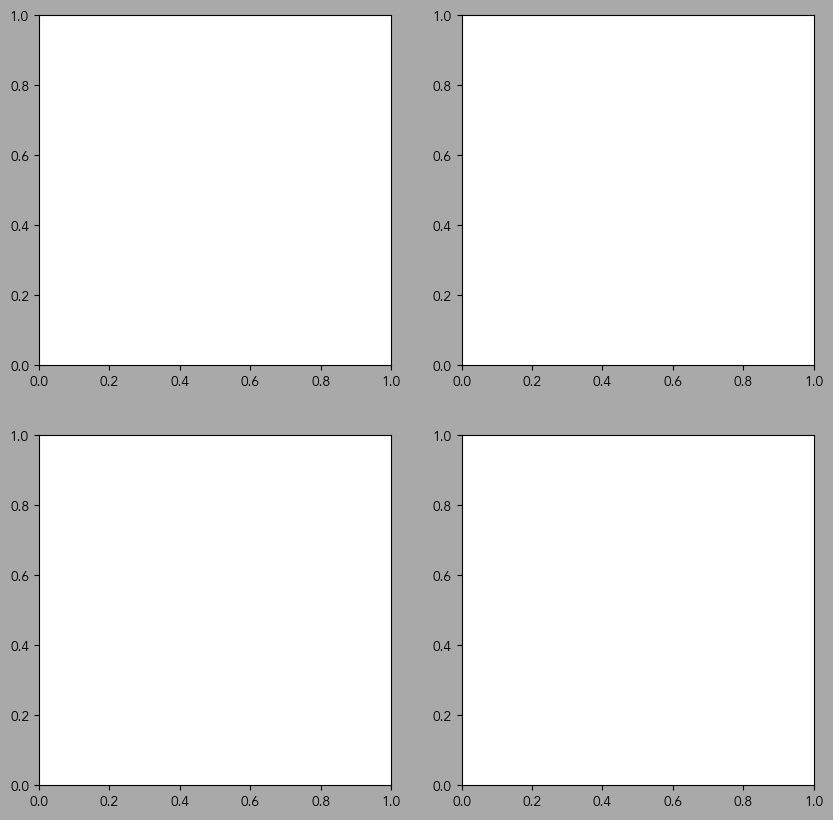

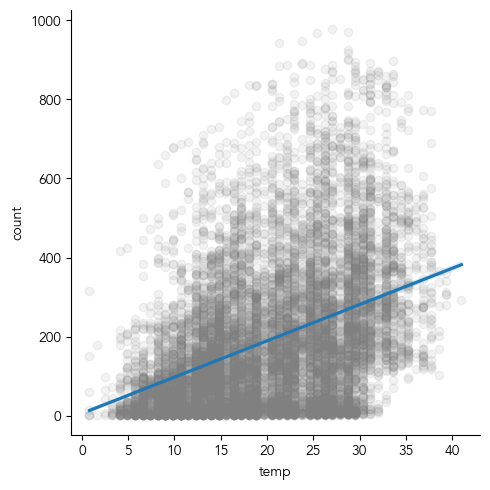

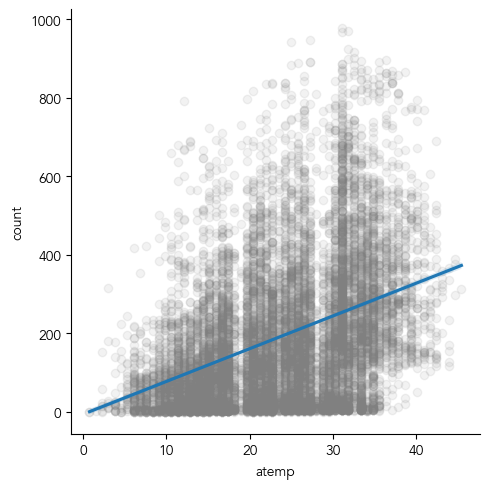

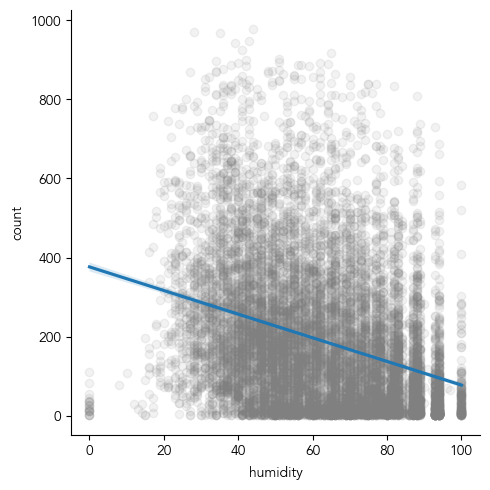

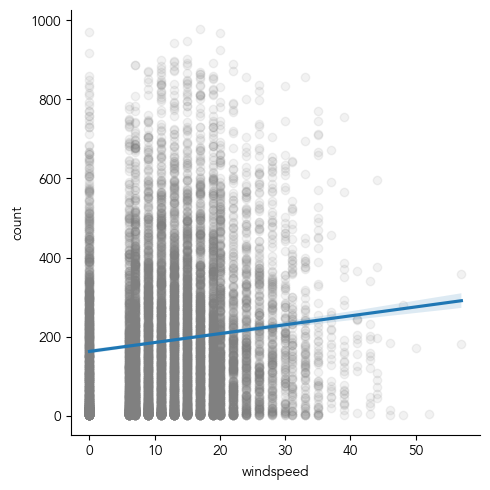

In [75]:
f, ax = plt.subplots(2, 2, figsize = (10, 10), facecolor = 'darkgray')

sns.lmplot(data = bike_df, x = 'temp', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1})
sns.lmplot(data = bike_df, x = 'atemp', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1})
sns.lmplot(data = bike_df, x = 'humidity', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1})
sns.lmplot(data = bike_df, x = 'windspeed', y = 'count', scatter_kws={'color': 'gray', 'alpha': 0.1})
